Buscamos realizar un Modelo para la Segmentación de clientes utilizando la Base de Datos "Mall_Customers.csv"





In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

from scipy.stats import probplot


In [2]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [3]:
data = pd.read_csv('/gdrive/MyDrive/Mall_Customers.csv')

**Hacemos un análisis del Dataset:**

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Se elimina la columna Customer ID ya que no nos aporta datos de interés a la hora de realizar el análisis de datos y la posterior clusterización**

In [4]:
id_series = data['CustomerID']
id_series.shape

(200,)

In [5]:
data = data.drop(['CustomerID'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


**Se empieza a realizar un Análisis de las columnas del Dataset:**

In [12]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0, 0.5, 'Proporción Usuarios')

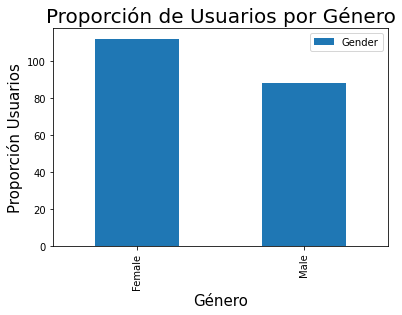

In [10]:
ax=data["Gender"].value_counts().plot(kind="bar")
plt.legend()
ax.set_title('Proporción de Usuarios por Género',fontsize=20)
ax.set_xlabel('Género',fontsize=15)
ax.set_ylabel('Proporción Usuarios',fontsize=15)

Realizamos un gráfico para comparar la distribución de ingresos según género:

Text(0, 0.5, 'Usuarios')

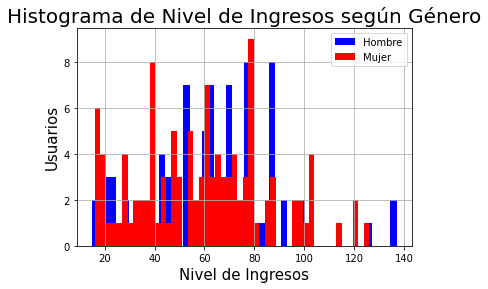

In [13]:
ax=data[data["Gender"]=="Male"]["Annual Income (k$)"].hist(bins=50,color="b",label='Hombre') #Grafico que compara histogramas de precios de marcas
ax=data[data["Gender"]=="Female"]["Annual Income (k$)"].hist(bins=50,color="r",label='Mujer')

plt.legend()
ax.set_title('Histograma de Nivel de Ingresos según Género',fontsize=20)
ax.set_xlabel('Nivel de Ingresos',fontsize=15)
ax.set_ylabel('Usuarios',fontsize=15)

Comparamos también la distribución del nivel de gasto según género:

Text(0, 0.5, 'Cantidad de Usuarios')

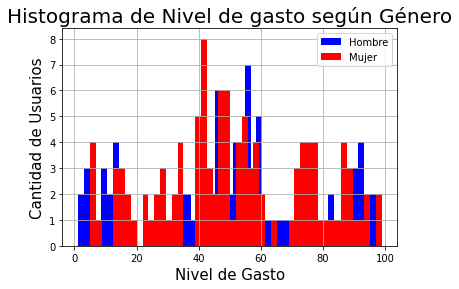

In [14]:
ax=data[data["Gender"]=="Male"]["Spending Score (1-100)"].hist(bins=50,color="b",label='Hombre')
ax=data[data["Gender"]=="Female"]["Spending Score (1-100)"].hist(bins=50,color="r",label='Mujer')

plt.legend()
ax.set_title('Histograma de Nivel de gasto según Género',fontsize=20)
ax.set_xlabel('Nivel de Gasto',fontsize=15)
ax.set_ylabel('Cantidad de Usuarios',fontsize=15)

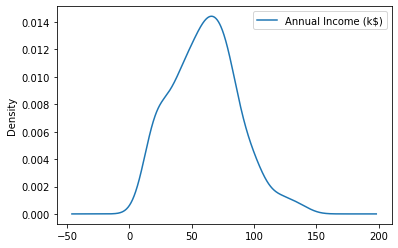

In [16]:
pd.DataFrame(data["Annual Income (k$)"]).plot(kind='density') 

Text(0, 0.5, 'Ingresos k$ anuales')

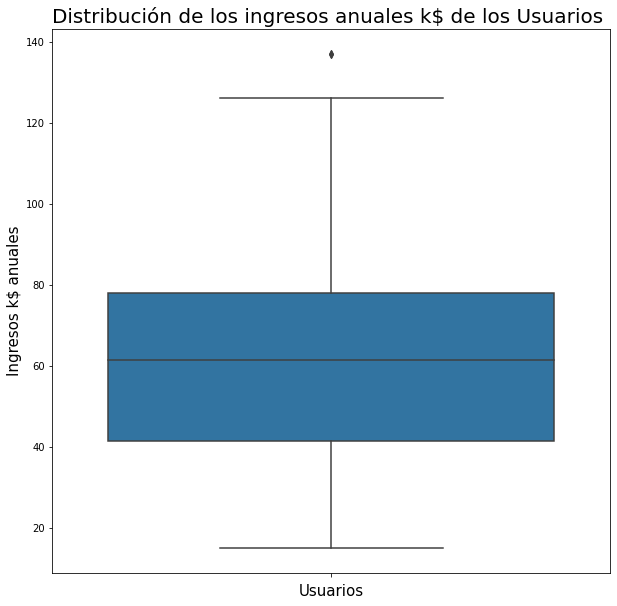

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=data["Annual Income (k$)"])

ax.set_title('Distribución de los ingresos anuales k$ de los Usuarios ',fontsize=20)
ax.set_xlabel('Usuarios',fontsize=15)
ax.set_ylabel('Ingresos k$ anuales',fontsize=15)

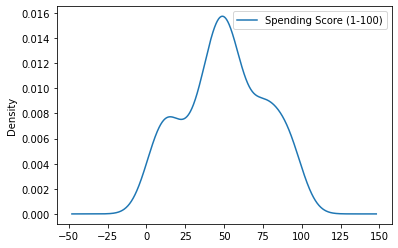

In [17]:
pd.DataFrame(data["Spending Score (1-100)"]).plot(kind='density') 

Text(0, 0.5, 'Nivel de gasto')

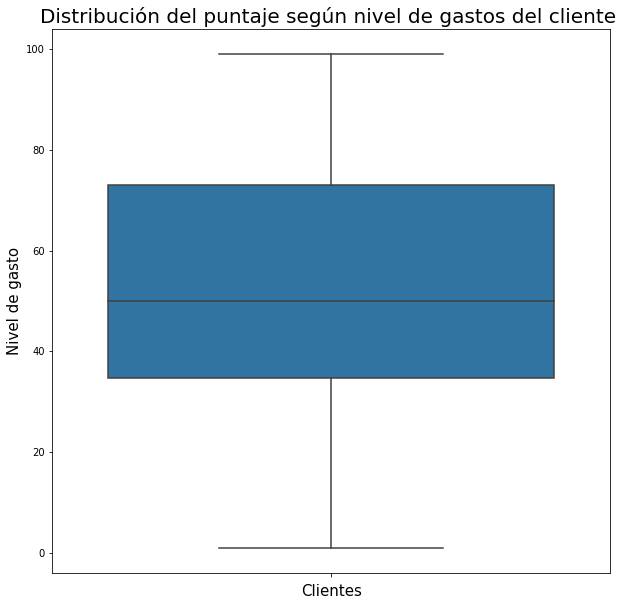

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.boxplot(y=data["Spending Score (1-100)"])

ax.set_title('Distribución del puntaje según nivel de gastos del cliente ',fontsize=20)
ax.set_xlabel('Clientes',fontsize=15)
ax.set_ylabel('Nivel de gasto',fontsize=15)

Text(0, 0.5, 'Puntaje de gasto')

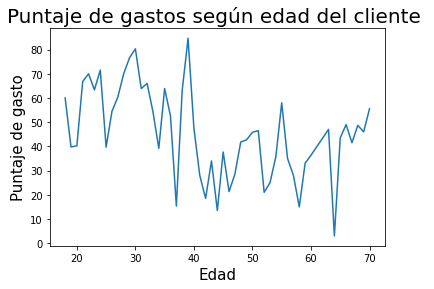

In [6]:
edad = data.groupby('Age').describe()
ax = sns.lineplot(x=edad.index,y=edad["Spending Score (1-100)"]['mean'])
ax.set_title('Puntaje de gastos según edad del cliente ',fontsize=20)
ax.set_xlabel('Edad',fontsize=15)
ax.set_ylabel('Puntaje de gasto',fontsize=15)


Text(0, 0.5, 'Nivel de ingresos')

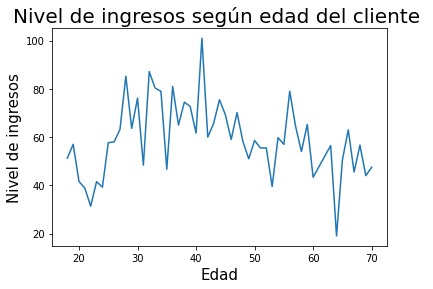

In [7]:
ax = sns.lineplot(x=edad.index,y=edad['Annual Income (k$)']['mean'])
ax.set_title('Nivel de ingresos según edad del cliente ',fontsize=20)
ax.set_xlabel('Edad',fontsize=15)
ax.set_ylabel('Nivel de ingresos',fontsize=15)

**Gráfico de Correlación de categorías:**

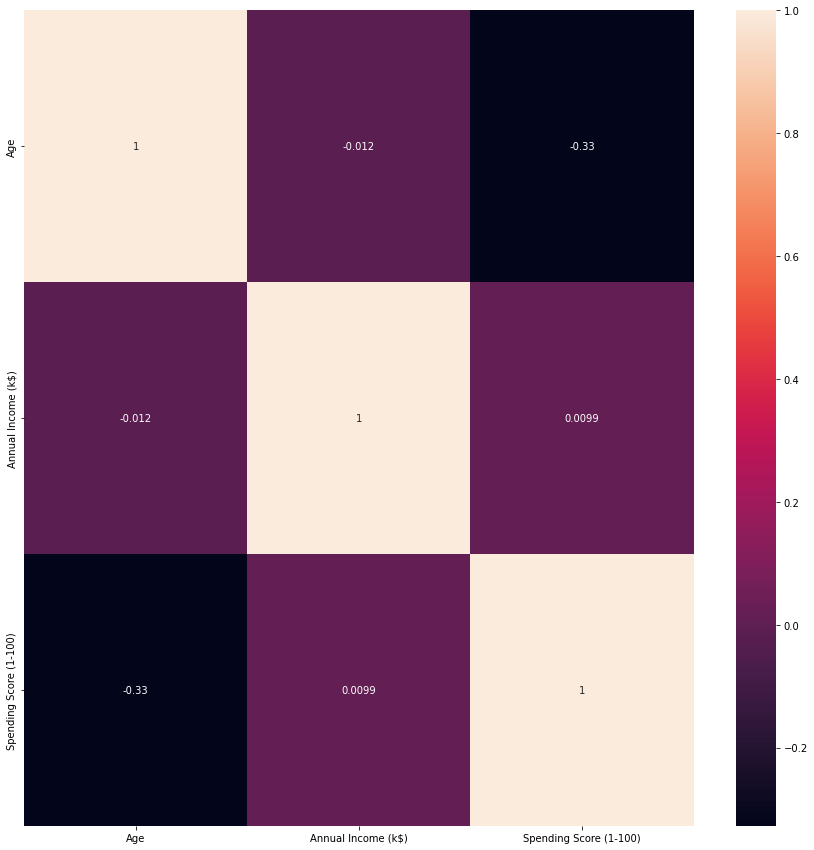

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),
           annot=True)

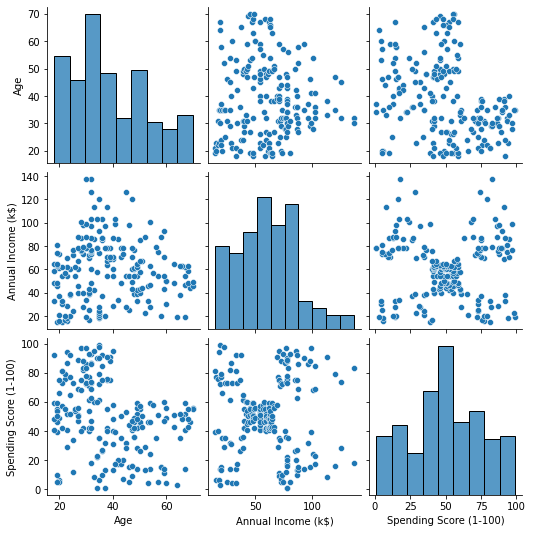

In [36]:
sns.pairplot(data)

**Para evitar sesgos y ya que no consideramos relevante para la segmentación de clientes el género, procedemos a eliminar la categoría de nuestro dataset.
Cómo buscaremos el segmento de clientes con mayor potencial para hacer compras a través de un e-commerce, consideraremos el nivel de Ingresos y el puntaje de gastos de los clientes como variables relevantes en la clusterización. La primera debido a que los ingresos de los clientes marcan en la mayoría de los casos el consumo de los mismos y la segunda porque nos indica la actividad de cada cliente. Dejaremos de lado la edad de los clientes ya que el ecommerce cuenta con todo rango de precios y categorías lo cual hace que sea muy relativo el nivel de compras según la misma.
Crearemos la base df_cluster, la cual no poseera las columnas "Age" y "Gender"**

In [7]:
df_cluster = data.drop(['Age'], axis=1)
df_cluster = df_cluster.drop(['Gender'],axis=1)
df_cluster.shape

(200, 2)

In [20]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [21]:
df_cluster.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


**Procedemos ahora a eliminar datos Outliers, previo al modelado:**

In [8]:
import scipy.stats as stats

#find Q1, Q3, and interquartile range for each column
Q1 = df_cluster.quantile(q=.25)
Q3 = df_cluster.quantile(q=.75)
IQR = df_cluster.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df_clean = df_cluster[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df_clean.shape

(198, 2)

**Procedemos a la normalización de los datos:**

In [9]:
df_norm=(df_clean-df_clean.min())/(df_clean.max()-df_clean.min())

In [10]:
df_norm.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


**Utilizamos el Método del codo para ver el número de Clusters más óptimo:**

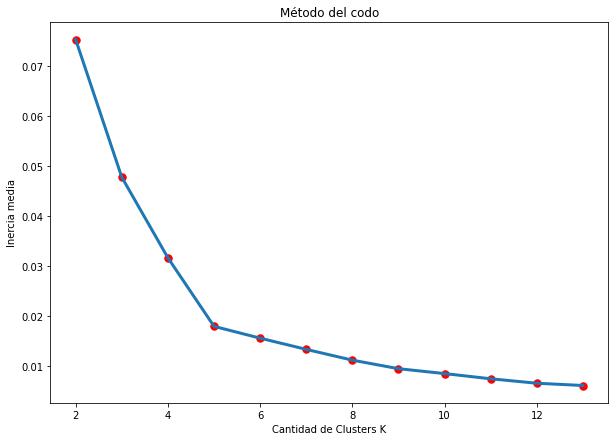

In [41]:
np.arange(2,14)

# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,df_norm.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')

plt.show()

La gráfica nos indica que el número óptimo de clusters se ubica entre 5 y 6

Utilizamos ahora el Método de la Silueta, para comparar los resultados obtenidos en el Método anterior:

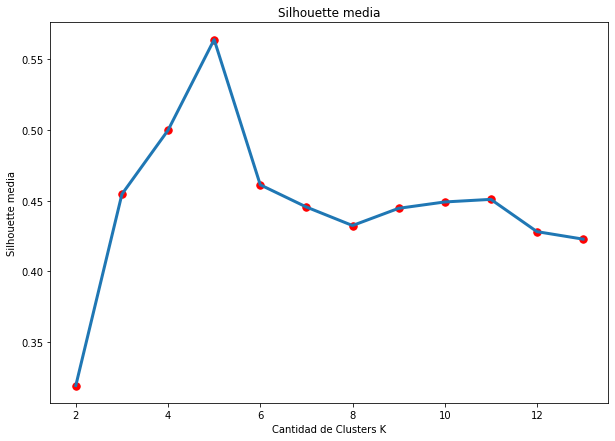

In [42]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(df_norm, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media')

plt.show()

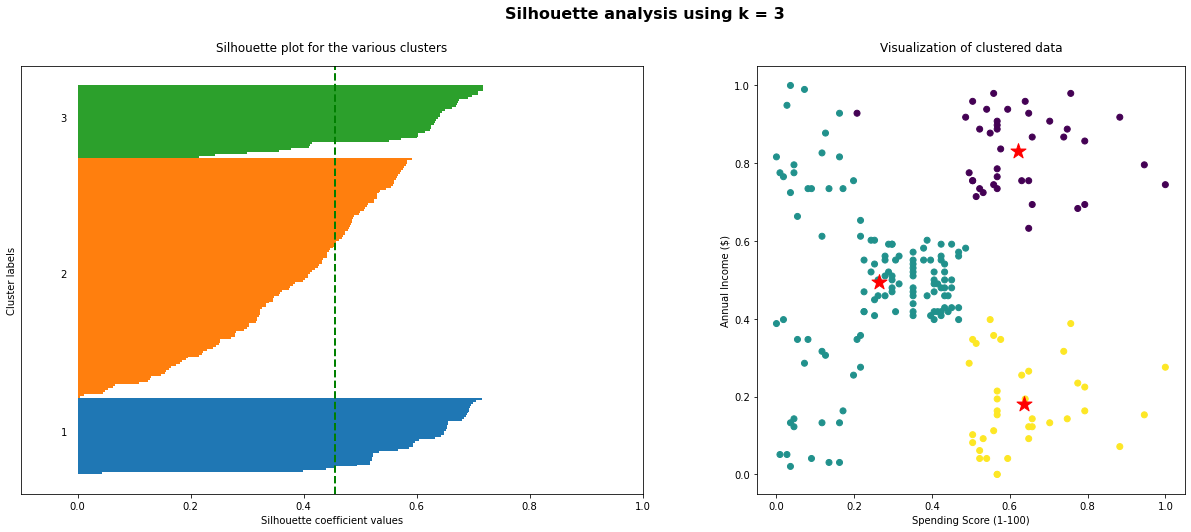

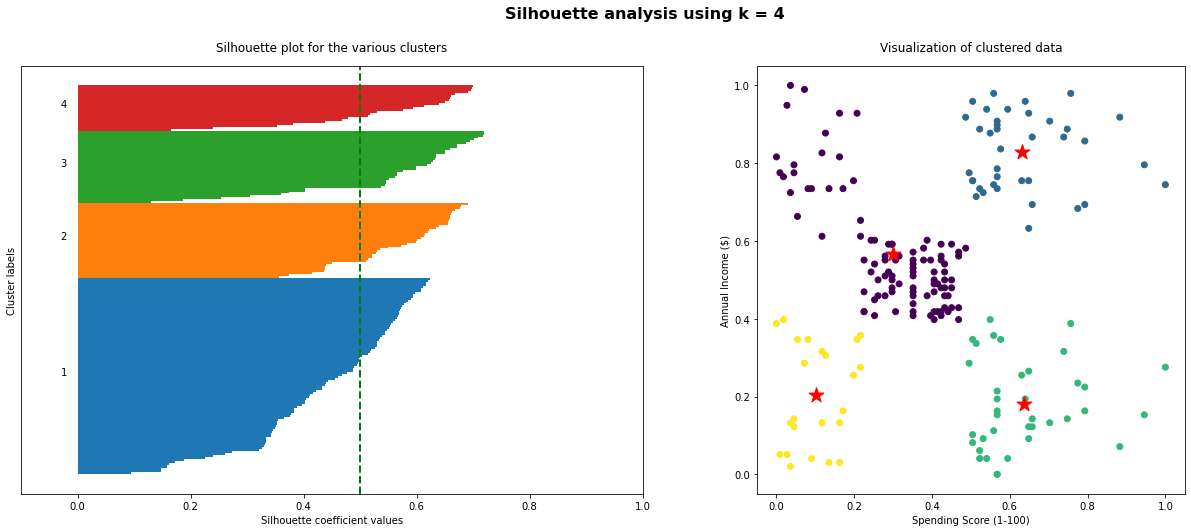

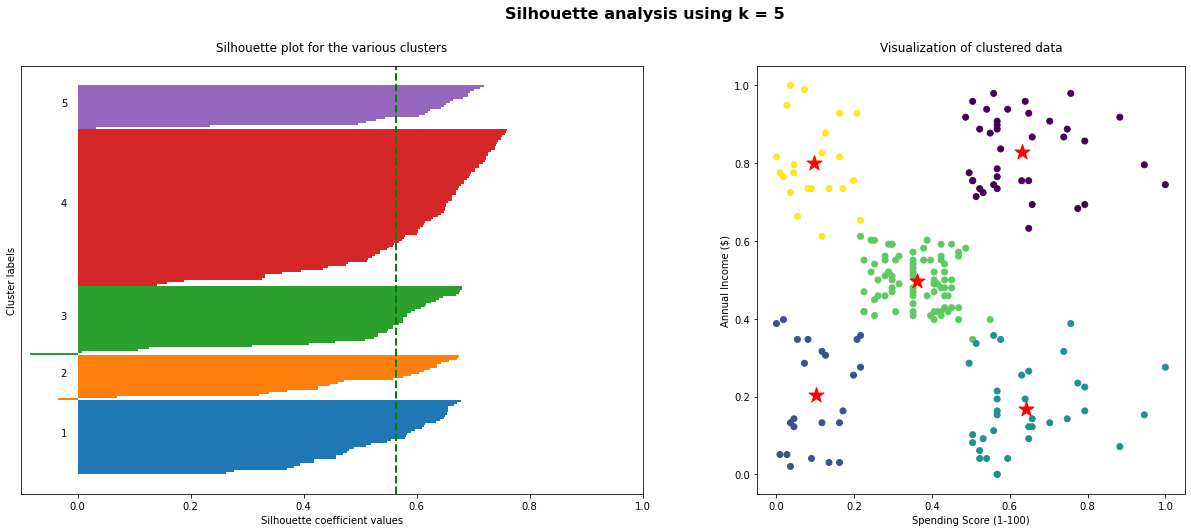

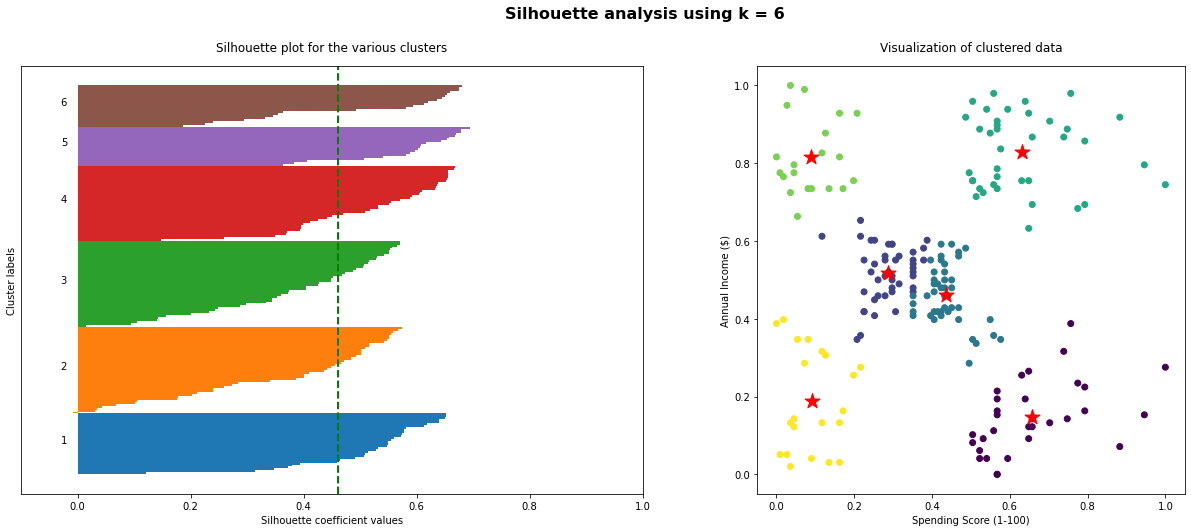

In [43]:
X_std = df_norm

lista_k = [3,4,5,6]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
        # Scatter plot of data colored with labels
    ax2.scatter(X_std.iloc[:, 0], X_std.iloc[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('Spending Score (1-100)')
    ax2.set_ylabel('Annual Income ($)')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);


Observando las gráficas obtenidas, se decide entrenar el modelo con un número de Clusters k=5

**Utilizando KMEANS:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



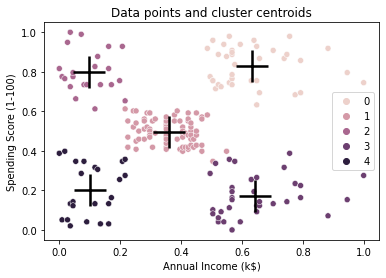

In [44]:
# Defino y entreno el modelo
km = KMeans(n_clusters=5)
km = km.fit(df_norm)
# Obtengo la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(df_norm.iloc[:, 0], df_norm.iloc[:, -1], hue = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [45]:
df_analisis = df_norm.copy()
df_analisis.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


In [47]:
df_analisis.describe()

,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000
mean,0.403494,0.502010
std,0.227363,0.262723
min,0.000000,0.000000
25%,0.229730,0.346939
50%,0.414414,0.500000
75%,0.565315,0.732143
max,1.000000,1.000000


In [46]:
for k in range(km.n_clusters):
    print("Cluster {:d} (Nivel de Ingresos: {:2f} ,Puntaje de gasto: {:2f} ".format(k, km.cluster_centers_[k,0], km.cluster_centers_[k,1]))

Cluster 0 (Nivel de Ingresos: 0.632527 ,Puntaje de gasto: 0.827605 
Cluster 1 (Nivel de Ingresos: 0.361149 ,Puntaje de gasto: 0.497066 
Cluster 2 (Nivel de Ingresos: 0.096642 ,Puntaje de gasto: 0.799629 
Cluster 3 (Nivel de Ingresos: 0.642728 ,Puntaje de gasto: 0.169096 
Cluster 4 (Nivel de Ingresos: 0.101841 ,Puntaje de gasto: 0.203194 


**Caracterización de los Clusters:**

In [49]:
clustersDf = pd.DataFrame(etiquetas_)
clustersDf.columns = ['cluster_predicted']
df_kmeans_clusters = pd.concat([df_analisis, clustersDf], axis = 1).reset_index()
df_kmeans_clusters.head()

,index,Annual Income (k$),Spending Score (1-100),cluster_predicted
0,0,0.000000,0.387755,4
1,1,0.000000,0.816327,2
2,2,0.009009,0.051020,4
3,3,0.009009,0.775510,2
4,4,0.018018,0.397959,4


Text(0, 0.5, 'Clusters de Usuarios')

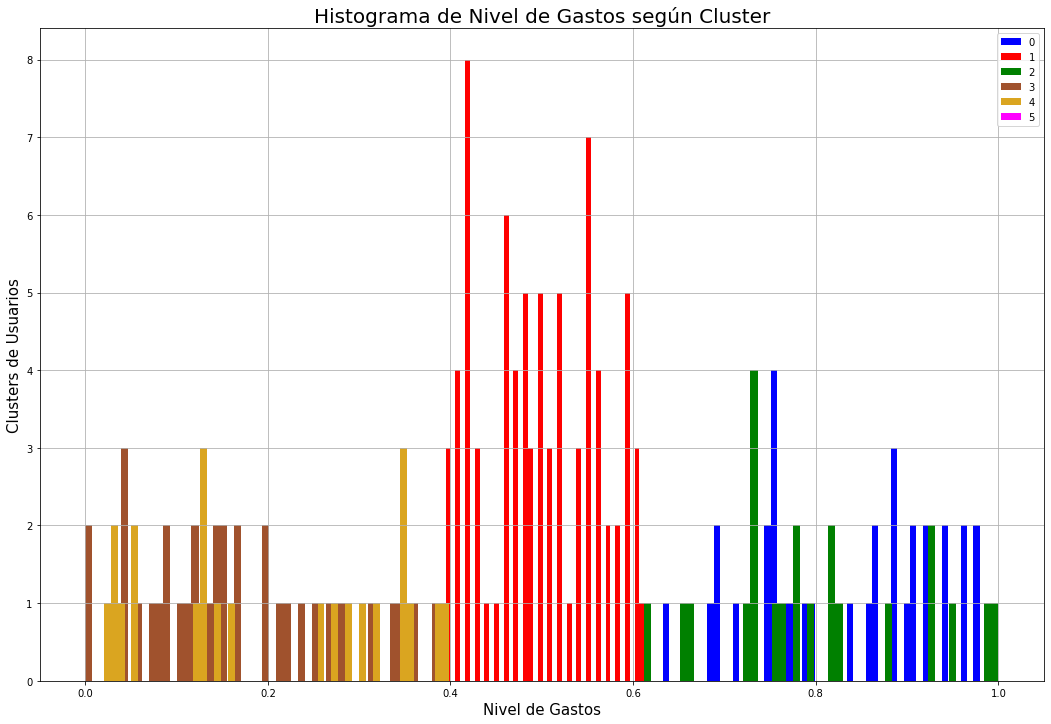

In [50]:
plt.figure(figsize=(18,12))
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==0]["Spending Score (1-100)"].hist(bins=50,color="b",label ='0') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==1]["Spending Score (1-100)"].hist(bins=50,color="r",label ='1') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==2]["Spending Score (1-100)"].hist(bins=50,color="g",label ='2') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==3]["Spending Score (1-100)"].hist(bins=50,color="sienna",label ='3') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==4]["Spending Score (1-100)"].hist(bins=50,color="goldenrod",label ='4') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==5]["Spending Score (1-100)"].hist(bins=50,color="magenta",label ='5') 
plt.legend()
ax.set_title('Histograma de Nivel de Gastos según Cluster',fontsize=20)
ax.set_xlabel('Nivel de Gastos',fontsize=15)
ax.set_ylabel('Clusters de Usuarios',fontsize=15)

Text(0, 0.5, 'Clusters de Usuarios')

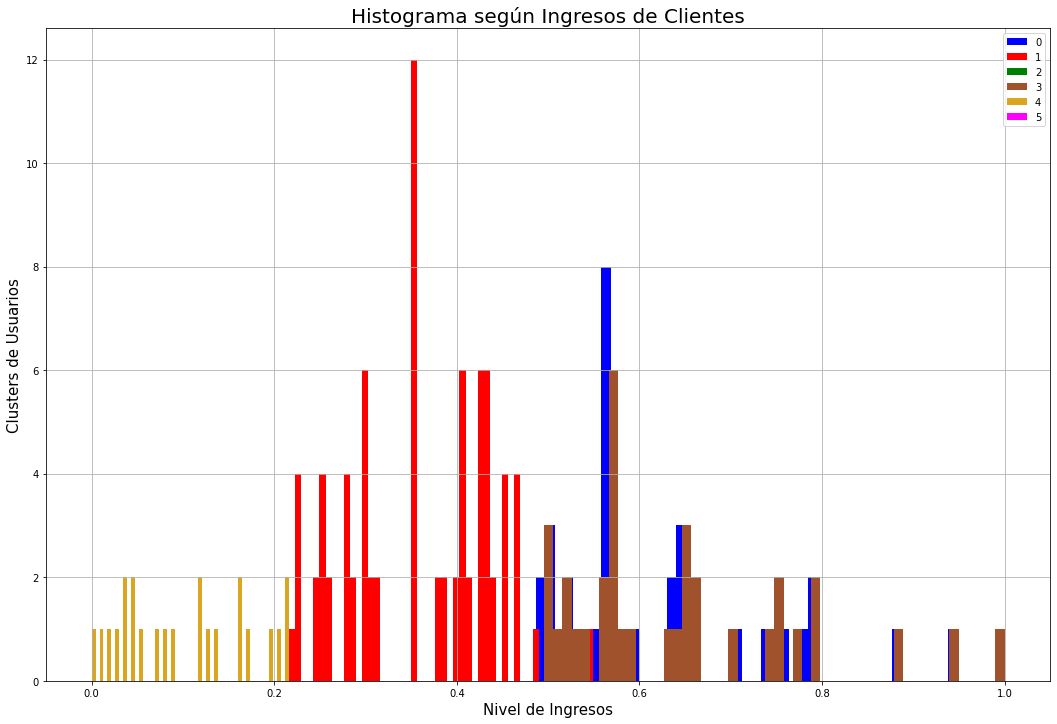

In [53]:
plt.figure(figsize=(18,12))
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==0]["Annual Income (k$)"].hist(bins=50,color="b",label ='0') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==1]["Annual Income (k$)"].hist(bins=50,color="r",label ='1') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==2]["Annual Income (k$)"].hist(bins=50,color="g",label ='2') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==3]["Annual Income (k$)"].hist(bins=50,color="sienna",label ='3') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==4]["Annual Income (k$)"].hist(bins=50,color="goldenrod",label ='4') 
ax=df_kmeans_clusters[df_kmeans_clusters["cluster_predicted"]==5]["Annual Income (k$)"].hist(bins=50,color="magenta",label ='5') 
plt.legend()
ax.set_title('Histograma según Ingresos de Clientes',fontsize=20)
ax.set_xlabel('Nivel de Ingresos',fontsize=15)
ax.set_ylabel('Clusters de Usuarios',fontsize=15)

In [57]:
import plotly.express as px

df_kmeans_clusters["cluster_predicted"] = df_kmeans_clusters["cluster_predicted"].astype(str)
fig = px.scatter(df_kmeans_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", color="cluster_predicted", symbol="cluster_predicted",color_discrete_sequence=["#ff9933","#00ffff","#ff3333","#00ff00","#0080ff", "#990099"])
fig.show()

**Utilizando Clusterización, podemos observar Clusters bien definidos:
Los Clusters 0 y 3 son los de nivel de ingresos mas alto, pero mientras el cluster 0 tiene un puntaje de gastos alto, el cluster 3 tiene un puntaje de gastos bajo, lo que lleva a pensar que está formado por personas mas conservadoras a la hora de gastar
Los Clusters 2 y 4 a su vez, son de personas con un nivel de ingreso bajo, de los cuales el cluster 4 posee también un nivel de gastos bajo, mientras que las personas del cluster 2 poseen un nivel de gastos alto
Por su parte el Cluster 1 posee un nivel de ingresos y de gastos mas bien intermedio
**

***Utilizamos DBSCAN:***

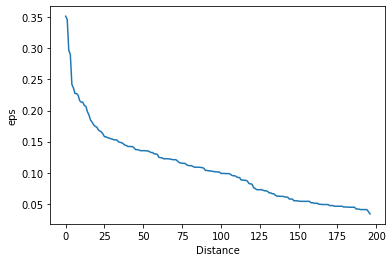

In [11]:
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [35]:
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=0.1, min_samples=7)
results = dbs_1.fit(df_norm).labels_

 2    96
 3    31
 4    26
-1    17
 1    16
 0    12
Name: Cluster_id_DBSCAN, dtype: int64


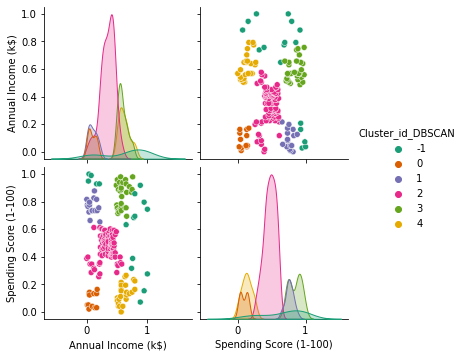

In [36]:

df_DBSCAN=df_norm.copy()
df_DBSCAN['Cluster_id_DBSCAN']=results
print (df_DBSCAN['Cluster_id_DBSCAN'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster_id_DBSCAN',palette='Dark2',diag_kind='kde')

In [37]:
labels=dbs_1.labels_

n_clusters_db=len(set(labels)) - (1 if -1 in labels else 0)  
print("Número de clusters: %d" %n_clusters_db)

n_noise_db= list(labels).count(-1)
print("Número de puntos de ruido: %d" % n_noise_db) 

Número de clusters: 5
Número de puntos de ruido: 17


In [38]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(df_norm,labels,dbs_1,n_clusters_db):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(dbs_1.labels_, dtype=bool)
    core_samples_mask_1[dbs_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = df_norm[class_member_mask & core_samples_mask_1]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = df_norm[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_db)
    plt.show()
    return

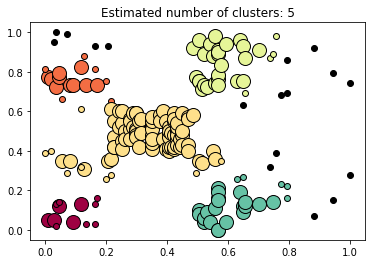

In [39]:
plot_DBSCAN(df_norm,labels,dbs_1,n_clusters_db)

Utilizando DBSCAN, observamos una distribución similar a utilizando Kmeans a la hora de formar grupos de clientes